## Interactive parameter tuning with napari and magicgui
A common task when processing image is to manually tune parameters until a segementation algorithm works fine on a give dataset. The [napari](https://napari.org) viewer and [magicgui](https://napari.org/magicgui/) offer the possibility to automatically build a user-interface where the user can tune parameters and see immediately how a corresponding segmentation will look like. This notebook demonstrates how this can be achieved from a simple python function that does the image processing.

In [1]:
# Inspired by
# https://github.com/pr4deepr/pyclesperanto_prototype/blob/master/napari_clij_widget.py
import napari
import pyclesperanto_prototype as cle
from magicgui import magicgui
from napari.types import ImageData, LabelsData

Our starting point is a function that implements a certain image processing workflow. In this example, we blur an image using a Gaussian filter, we threshold it using [Otsu's method](https://ieeexplore.ieee.org/document/4310076) and we apply connected component labeling to differentiate objects and label them.

In [2]:
@magicgui(auto_call=True)
def process_image(image_input: ImageData, sigma: float = 2) -> LabelsData:
    if input is not None:
        # process the image
        blurred = cle.gaussian_blur(image_input, sigma_x=sigma, sigma_y=sigma)
        binary = cle.threshold_otsu(blurred)
        labels = cle.connected_components_labeling_box(binary)

        return labels

We also need an example image to demonstrate the procedure.

In [3]:
# load data
from skimage.io import imread
image = imread('https://samples.fiji.sc/blobs.png')

Next, we start up the napari viewer, add the original image and append a automatically generated user interface, a dock widget, that allows us to configure the parameters of the function provided above. Furthermore, we take a screenshot of the viewer.

If you want to compute separable approximations, please install it with
pip install scikit-tensor-py3


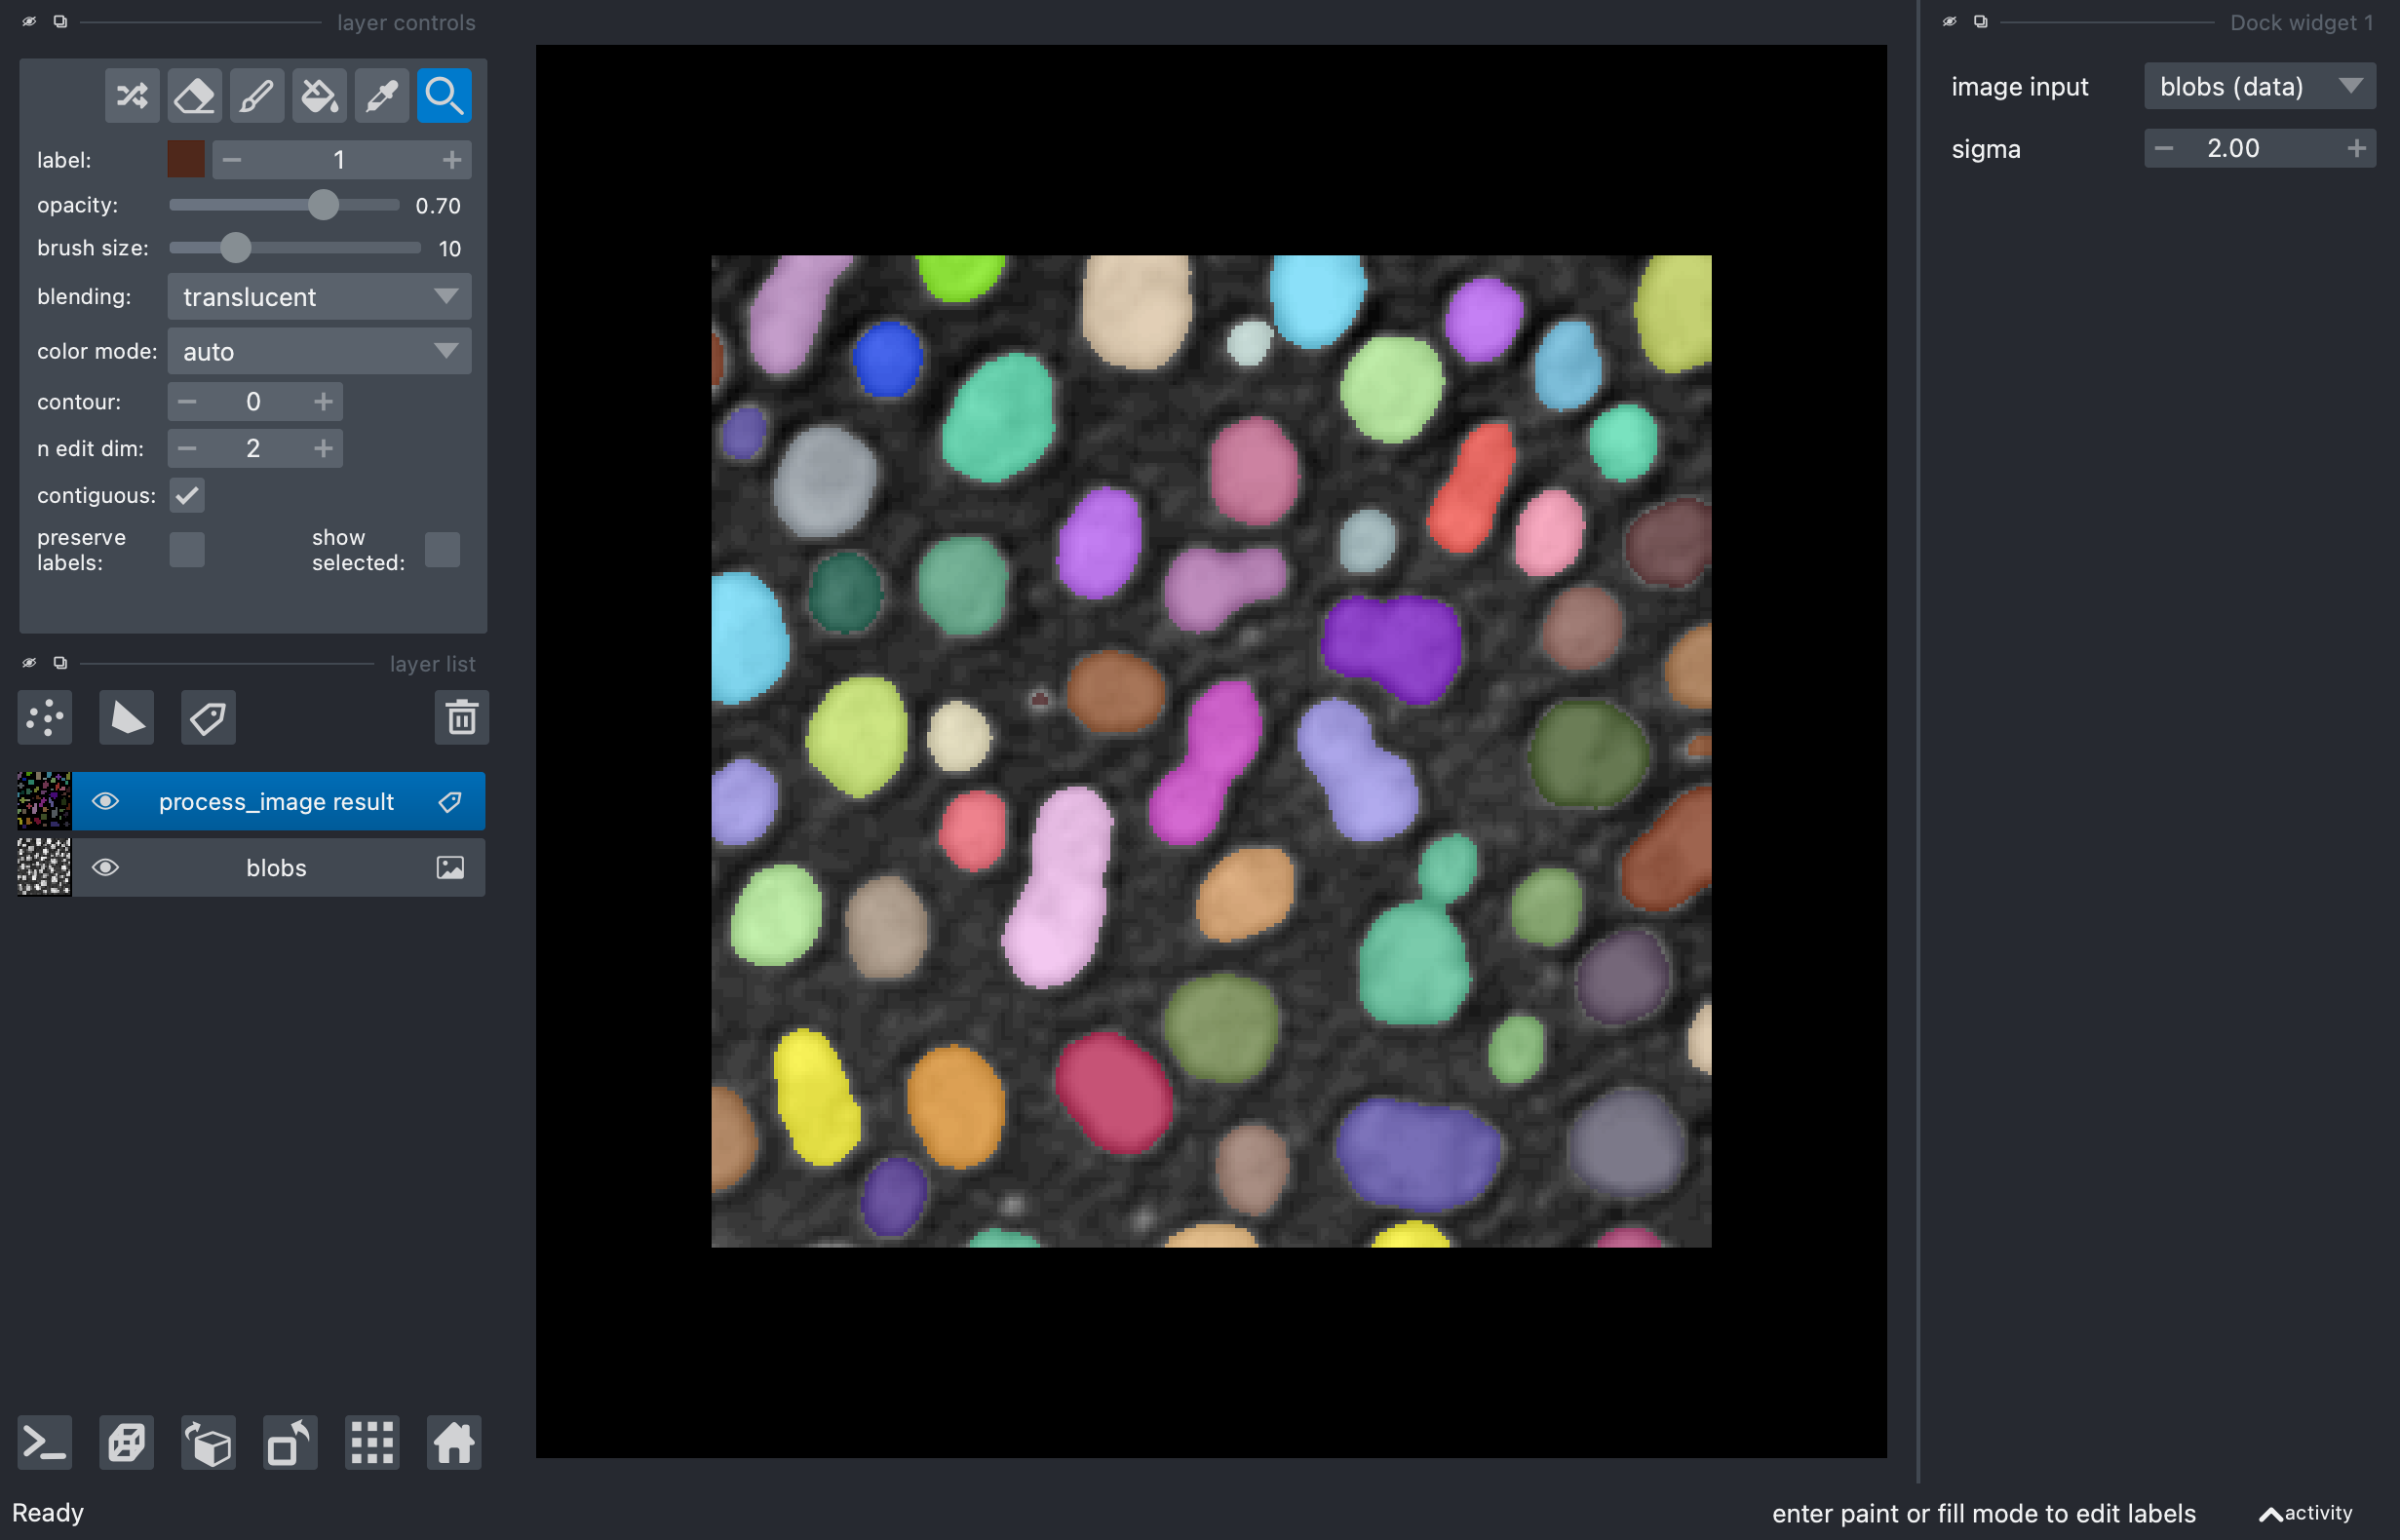

In [4]:
# start up napari
viewer = napari.Viewer()
viewer.add_image(image, name='blobs')

# generate a Graphical User Interface from the function above magically
viewer.window.add_dock_widget(process_image)

# take a screenshot
napari.utils.nbscreenshot(viewer)